# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "veromos"
filename = monster + "_20200415.csv"
multipliers = [1.2 * 3, 4.0, 3.0] # ATK
BASE_STATS = {
    'HP': 9225,
    'ATTACK': 769,
    'DEFENSE': 758,
    'SPEED': 100,
    'CRIT_RATE': .15,
    'CRIT_DMG': .5,
    'ACCURACY%': 25,
    'RESISTANCE%': 15,
}

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
df_full = pd.read_csv(filename, index_col="ID")
print(df.columns)
runes_cols = ["Rune #" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Avg Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Resistance',
       'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'Rune #1', 'Rune #2', 'Rune #3', 'Rune #4', 'Rune #5',
       'Rune #6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,...,Skilled Up,Acquired,Locked,Transmogrified,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6
ID,,,,,,,,,,,,,,,,,,,,,
3386040667,40,6,32598,1186,1647,206,82,72,30,50,...,Yes,2015-05-05 04:05:12,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
4439203906,40,6,35382,1283,1949,173,50,50,44,85,...,Yes,2015-08-24 01:59:13,No,No,ATK+,HP%,DEF+,DEF%,HP+,HP%
10064983880,40,6,33944,1034,1786,225,15,41,25,61,...,Yes,2017-09-12 01:07:12,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
3218843946,40,6,25681,1460,1836,211,53,58,42,67,...,Yes,2015-04-18 15:23:54,No,Yes,ATK+,SPD,DEF+,DEF%,HP+,HP%
2931314989,40,6,24433,1706,1305,200,21,33,62,156,...,Yes,2015-03-18 04:08:17,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,HP%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883389749,40,6,19017,978,1113,144,23,25,21,67,...,No,2017-03-26 01:00:01,No,No,ATK+,HP%,DEF+,DEF%,HP+,HP%
11110474284,40,6,13700,1264,1056,124,29,38,15,71,...,Yes,2018-02-27 17:09:49,No,No,ATK+,ATK+,DEF+,HP+,HP+,ATK%
4805461383,40,6,21391,1008,1126,118,28,38,18,53,...,Yes,2015-10-10 19:00:57,No,No,ATK+,HP%,DEF+,HP%,HP+,HP%


# Stars Distribution, picking 6*

(415, 24)


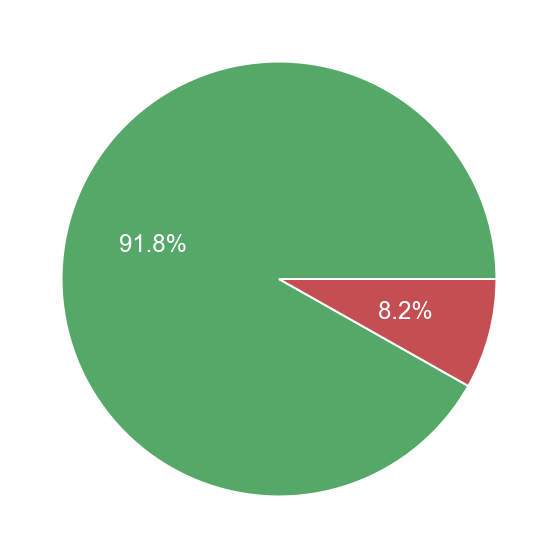

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Skilled Up

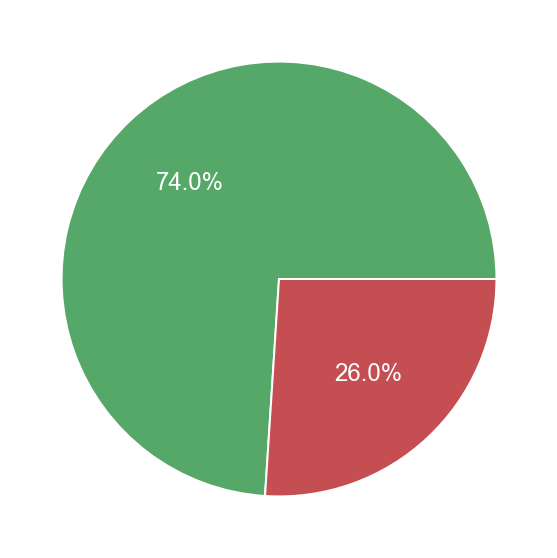

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Runes 

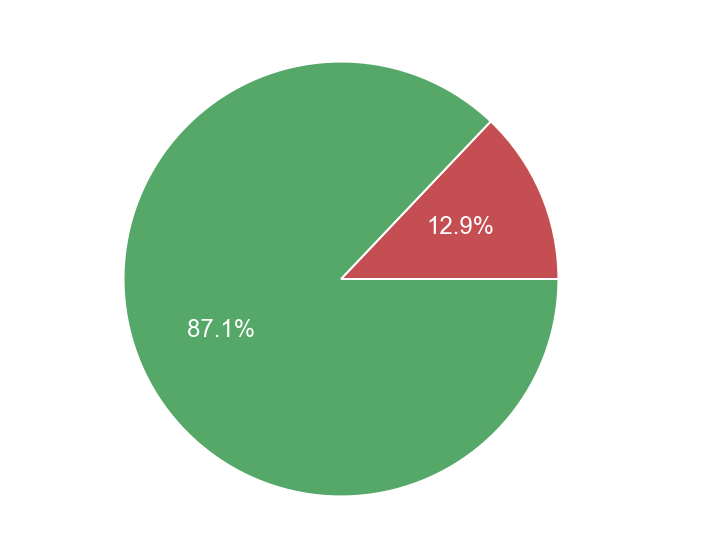

In [4]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without Runes': df_full.shape[0] - df.shape[0],
    'With Runes': df.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Build Type

<Figure size 720x720 with 0 Axes>

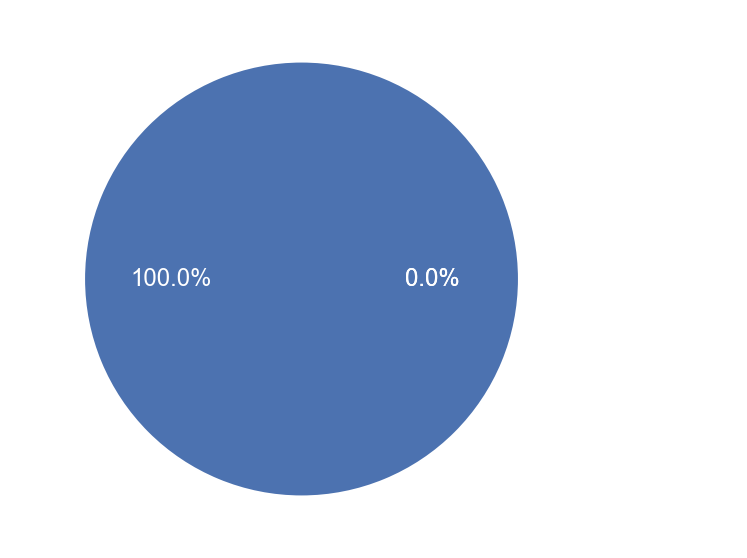

In [5]:
fig = plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10, 10))
dmg_dealer_df = df_stars6[(df_stars6["Crit Rate"] >= 100) & (df_stars6["Crit Dmg"] >= 150)] # shows mons with 100%+ crit rate & 150%+ crit damage
pseudo_dmg_dealer_df = df_stars6[(df_stars6["Attack"] > BASE_STATS['ATTACK'] * 2) & (df_stars6["Crit Rate"] >= 100) & (df_stars6["Crit Dmg"] < 150)]
pie_dmg_or_tanky = {
    'Damage Dealer \n[100% crit rate,\n 150% + crit dmg]': dmg_dealer_df.shape[0],
    'Squishy \n[+100% base attack,\nLow Crit Dmg]': pseudo_dmg_dealer_df.shape[0],
    'Other': df_stars6.shape[0] - pseudo_dmg_dealer_df.shape[0] - dmg_dealer_df.shape[0],
}
plt.pie(pie_dmg_or_tanky.values(), labels=pie_dmg_or_tanky.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_is_tanky.png", transparent=True, bbox_inches = "tight")
plt.show()

# Crit Rate

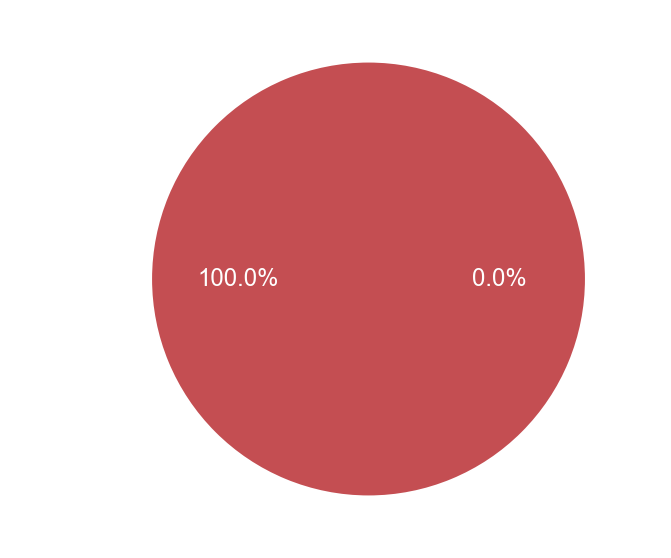

In [6]:
fig = plt.figure(figsize=(10, 10))
df_crit_rate_yes = df_stars6[df_stars6["Crit Rate"] >= 100]
df_crit_rate = {
    '100%': df_crit_rate_yes.shape[0],
    'Under 100%': df_stars6.shape[0] - df_crit_rate_yes.shape[0],
}
plt.pie(df_crit_rate.values(), labels=df_crit_rate.keys(), autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_crit_rate.png", transparent=True, bbox_inches = "tight")
plt.show()

# Transmog

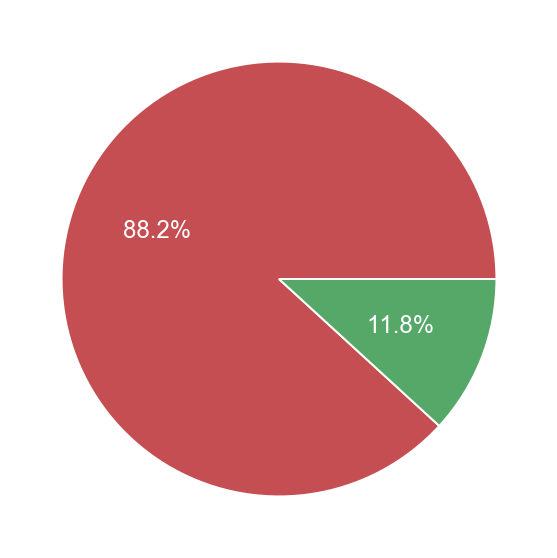

In [7]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Transmogrified"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_transmog.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

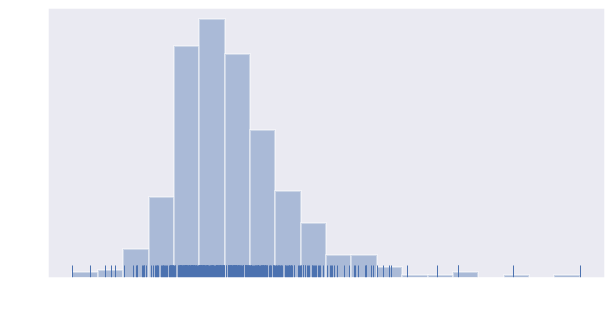

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# Total Attack Distribution

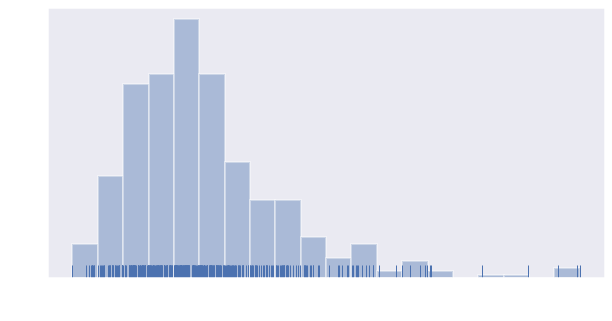

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

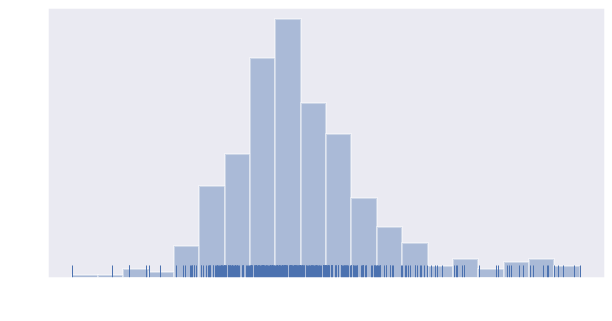

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Sets

Energy + Violent     112
Focus + Violent       49
Violent               45
Energy + Swift        39
Nemesis + Violent     28
Revenge + Violent     22
Blade + Violent       15
Shield + Violent      13
Guard + Violent        9
Despair + Energy       8
Swift                  8
Violent + Will         7
Focus + Swift          6
Name: Sets, dtype: int64


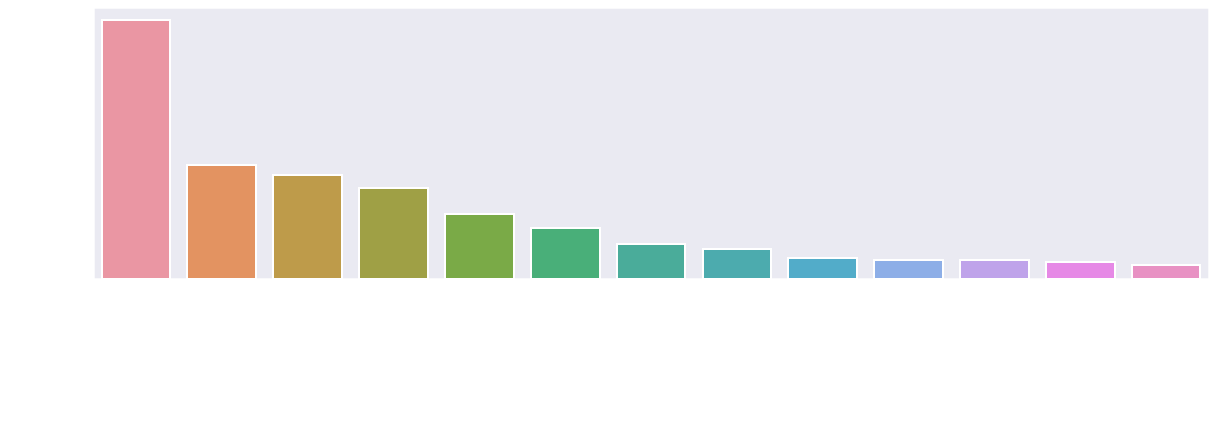

In [11]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 2]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# Eff. HP Distribution for most common set

Energy + Violent


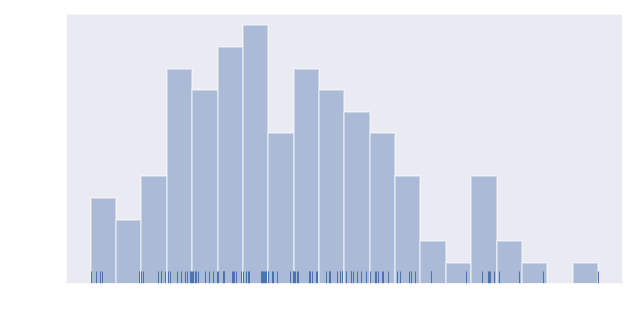

In [12]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_common_set_effhp.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

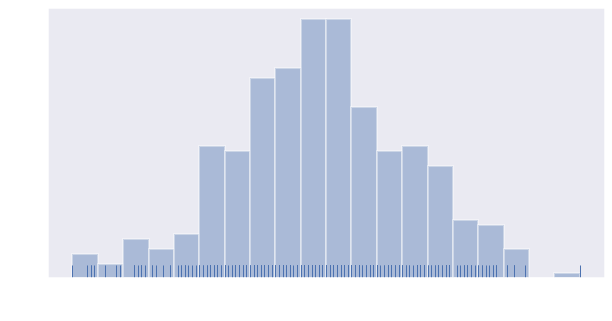

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Eff. HP

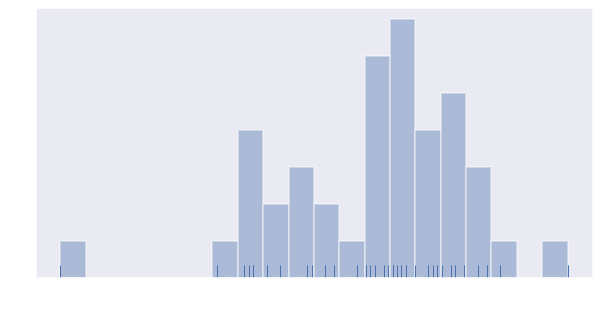

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

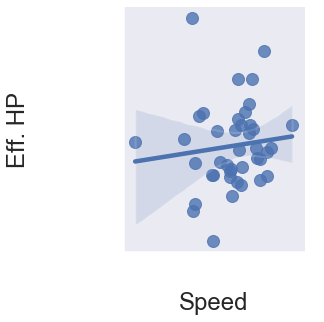

In [15]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Attack - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

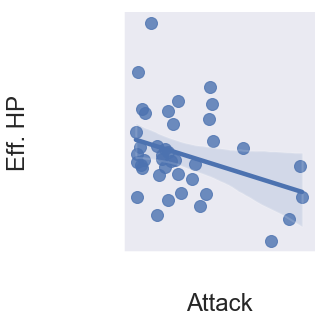

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Attack", y="Eff. HP", data=df_stars6.sort_values(['Attack'], ascending=False).head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_atk_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [17]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B
ID,,,,,,,,,,,
1,35986,2068,2173,245,90,117,99,196,101,281694,112743


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Locked', 'Rune #1', 'Rune #3', 'Rune #5', 'Level', 'Stars', 'Transmogrified', 'Skilled Up'], axis=1).reset_index(drop=True).rename(columns={'Resistance': 'Res', 'Accuracy': 'Acc'}).sort_values(['Avg Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>Crit Rate</th>
      <th>Crit Dmg</th>
      <th>Avg Eff</th>
      <th>Eff. HP</th>
      <th>Eff. HP D-B</th>
      <th>Sets</th>
      <th>Rune #2</th>
      <th>Rune #4</th>
      <th>Rune #6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>32598</td>
      <td>1186</td>
      <td>1647</td>
      <td>206</td>
      <td>82</td>
      <td>72</td>
      <td>30</td>
      <td>50</td>
      <td>101.17</td>
      <td>225073</td>
      <td>93535</td>
      <td>Endure + Focus</td>
      <td>SPD</td>
      <td>HP%</td>
      <td>HP%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>35382</td>
      <td>1283</td>
      <td>1949</td>
      <td>173</td>
      <td>50</td>
      <td>50</td>
      <td>44</td>
      <td>85</td>
      <td>100.59</t

# Most common Builds

   Rune #2 Rune #4 Rune #6  Count
39     SPD     HP%     HP%    253
37     SPD     HP%    DEF%     27
32     SPD    DEF%     HP%     25
18     HP%     HP%     HP%     15
27     SPD   CDmg%     HP%     11
35     SPD     HP%    ATK%      9
24     SPD    ATK%     HP%      7
40     SPD     HP%     HP+      6


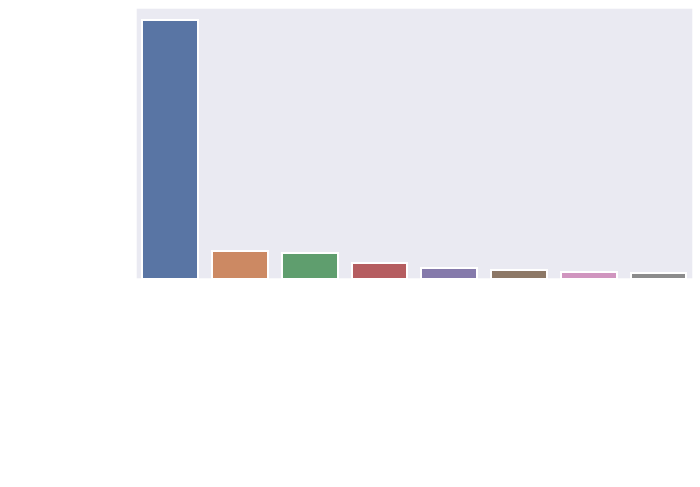

In [19]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 2].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

   Rune #2 Rune #4 Rune #6  Count
19     SPD     HP%     HP%     77
17     SPD     HP%    DEF%      6
8      SPD    ATK%     HP%      3
9      SPD   CDmg%     HP%      3
12     SPD    DEF%     HP%      3
15     SPD     HP%    ATK%      3


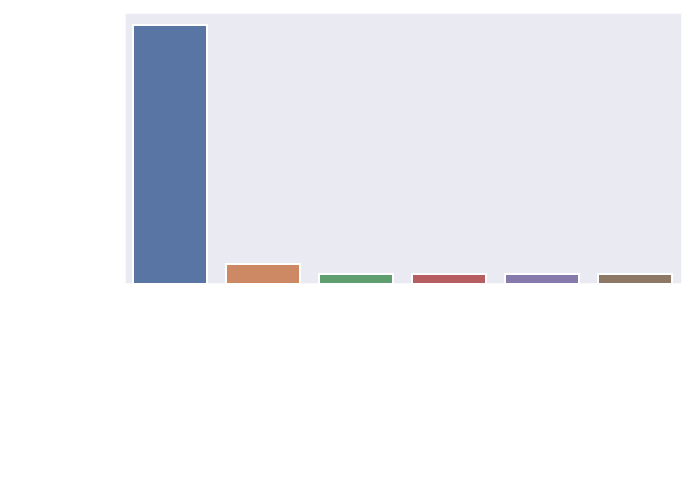

In [20]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 2].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

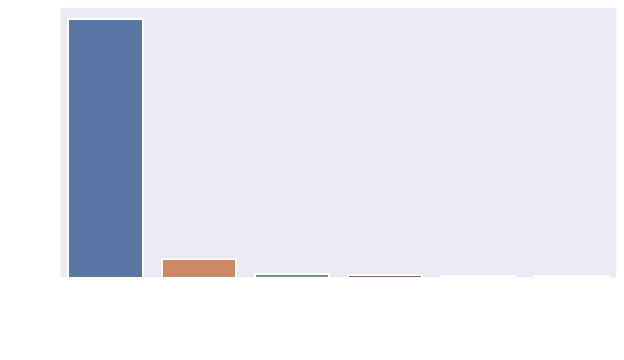

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

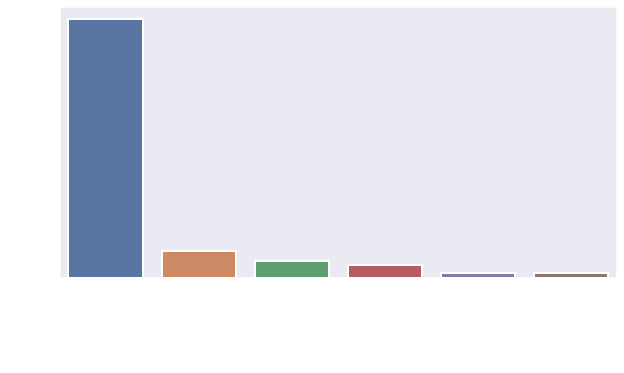

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

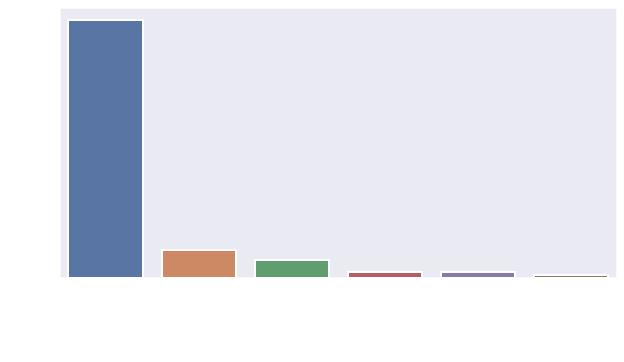

In [23]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")